K-Means interación 0/19
K-Means interación 1/19
K-Means interación 2/19
K-Means interación 3/19
K-Means interación 4/19
K-Means interación 5/19
K-Means interación 6/19
K-Means interación 7/19
K-Means interación 8/19
K-Means interación 9/19
K-Means interación 10/19
K-Means interación 11/19
K-Means interación 12/19
K-Means interación 13/19
K-Means interación 14/19
K-Means interación 15/19
K-Means interación 16/19
K-Means interación 17/19
K-Means interación 18/19
K-Means interación 19/19


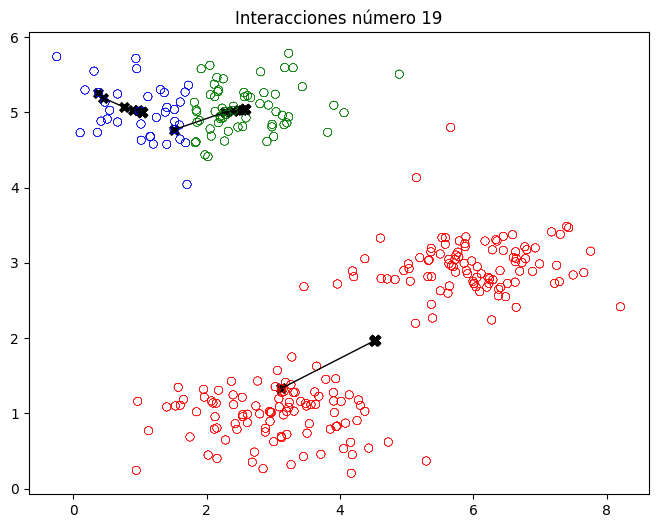

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
# Carga datos ejemplo
X = np.load("data/ex7_X.npy")

# FUNCIÓN: Encuentra centroide cercano
def find_closest_centroids(X, centroids):
    """
    Calcula los centroides para cada ejemplo
    
    Argumentos:
        X (ndarray): (m, n) Valores de entrada      
        centroids (ndarray): (K, n) centroides
    
    Retorna:
        idx (array_like): (m,) centroide cercano  
    """
    # Inicializa K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        # Calcula distancia entre ejemplo y todos los centroides
        distances = np.linalg.norm(X[i] - centroids, axis=1)       
        # Encuentra el índice del cercano centroide
        idx[i] = np.argmin(distances)
    return idx

# FUNCIÓN: Calcular centroides
def compute_centroids(X, idx, K):
    """
    Devuelve los nuevos centroides calculando las medias de los puntos de
    datos asignados a cada centroide.
    
    Argumentos:
        X (ndarray):   (m, n) Datos
        idx (ndarray): (m,) Matriz que contiene el índice del centroide más cercano para cada
        ejemplo en X. Concretamente, idx[i] contiene el índice del
        centroide más cercano al ejemplo i
        K (int):       numero de centroides
    Returns:
        centroids (ndarray): (K, n) Nuevos centroides calculados
    """
    # variables
    m, n = X.shape
    centroids = np.zeros((K, n))
     
    for k in range(K):
        # Encuentra índices de ejemplos asignados al centroide k
        indices_k = (idx == k)
        # Calcula la media de ejemplos asignados al centroide k
        centroids[k, :] = np.sum(X[indices_k, :], axis=0) / np.sum(indices_k)
    return centroids

# Implementar K-means
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Ejecuta el algoritmo K-Means en la matriz de datos X, donde cada fila de X es un
    único ejemplo
    """
    # Inicializa valores
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Ejecutar K-Means
    for i in range(max_iters): 
        print("K-Means interación %d/%d" % (i, max_iters-1))
        # Para cada ejemplo en X, asígna al centroide más cercano
        idx = find_closest_centroids(X, centroids) 
        # traza el progreso
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids           
        # Dadas las membresías, calcular nuevos centroides
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

# Inicializa Centroides   
def kMeans_init_centroids(X, K):
    """
    Esta función inicializa K centroides que van a ser
    utilizado en K-Means en el conjunto de datos X    
    Argumentoss:
        X (ndarray): Datos 
        K (int):     numero de centroides/clusters
    Retorna:
        centroides (ndarray): Centroides Inicializados
    """    
    # Reordenar aleatoriamente los índices de los ejemplos
    randidx = np.random.permutation(X.shape[0])
    # Tome los primeros K ejemplos como centroides
    centroids = X[randidx[:K]]
    return centroids 
#Ejecute esta celda repetidamente para ver diferentes result
# Establecer el número de centroides y el número máximo de iteraciones
K = 3
max_iters = 20
# Establecer centroides iniciales seleccionando ejemplos aleatorios
initial_centroids = kMeans_init_centroids(X, K)
# Ejecutar K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)   

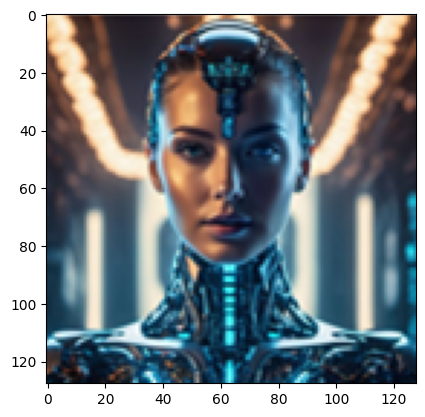

In [2]:
import numpy as np
# carga imagen del disco
original_img = plt.imread('Portada.png')
# Seleciona solamente los tres canales RGB
converted_img = original_img[:, :, :3]
# Visualiza la imagen
plt.imshow(converted_img)

K-Means interación 0/9
K-Means interación 1/9
K-Means interación 2/9
K-Means interación 3/9
K-Means interación 4/9
K-Means interación 5/9
K-Means interación 6/9
K-Means interación 7/9
K-Means interación 8/9
K-Means interación 9/9


<Figure size 800x600 with 0 Axes>

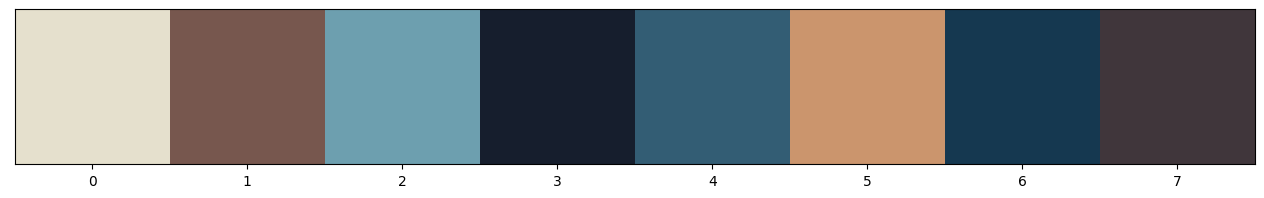

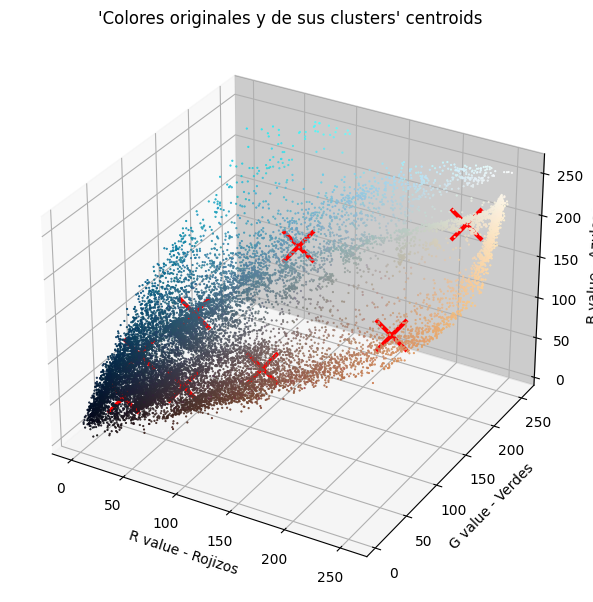

In [3]:
# prepara la imagen
X_img = np.reshape(converted_img, (converted_img.shape[0] * converted_img.shape[1], 3))

# Ejecuta nuestro algoritmo anterior con k=8 y 10 interacciones
K = 8
max_iters = 10

# Inicializa centroides. 
initial_centroids = kMeans_init_centroids(X_img, K)

# ejecuta K-Means 
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
# Visualiza los 16 colores selected
show_centroid_colors(centroids)
# Dibuja loc colores de la imagen y centroides
plot_kMeans_RGB(X_img, centroids, idx, K)

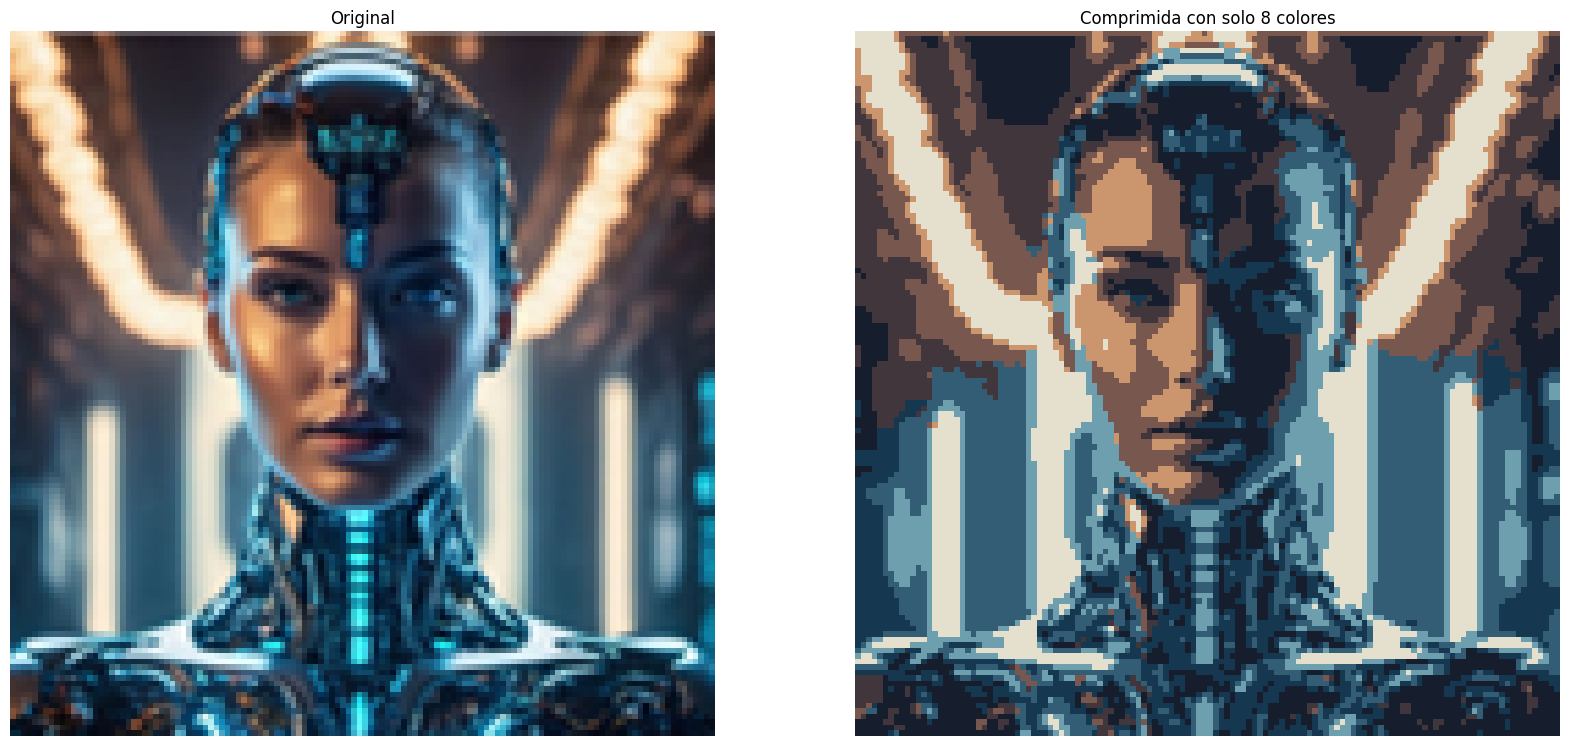

In [4]:
# Encuentra los centroides
idx = find_closest_centroids(X_img, centroids)

# Sustituye cada pixel de color por el de su centroide
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, converted_img.shape) 

# Muestra la imagen original
fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.axis('on')
ax[0].imshow(converted_img)
ax[0].set_title('Original')
ax[0].set_axis_off()
# muestra la imagen comprimida
ax[1].imshow(X_recovered)
ax[1].set_title('Comprimida con solo %d colores'%K)
ax[1].set_axis_off()